In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv(snakemake.input[0], index_col=0)
test_data = pd.read_csv(snakemake.input[1], index_col=0)

features = ["H7N6F1S3", "H5N4", "H3N5", "H4N3S1"]

X_train = train_data[features]
y_train = train_data["group"]
X_test = test_data[features]
y_test = test_data["group"]

In [18]:
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_depth=3)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred = tree.predict(X_test)
y_proba = tree.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.7890625
F1 Score: 0.7428571428571429
ROC AUC: 0.8496417099085743


/Users/fubin/miniforge3/envs/hcc/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
/Users/fubin/miniforge3/envs/hcc/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names


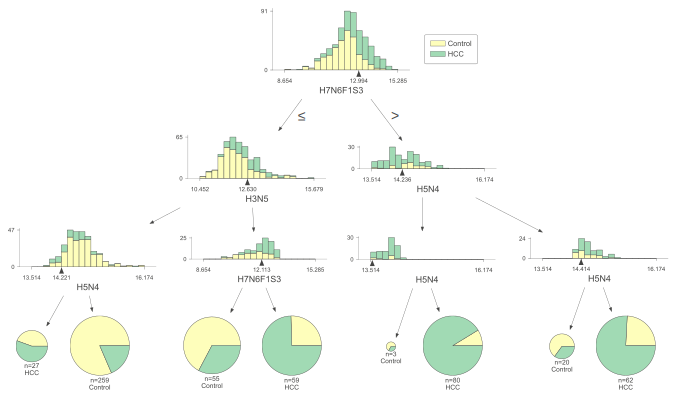

In [21]:
viz_model = dtreeviz.model(
    tree,
    X_train=X_train, y_train=y_train,
    feature_names=features,
    class_names=["Control", "HCC"]
)
v = viz_model.view()
v.save(snakemake.output[0])